# 1.1 Install scikit-learn & required library
This project require numpy, pandas, matplotlib,... and scikit-learn be installed. Run the following code to install the requirements.

In [2]:
!python -m pip install -U scikit-learn
!python -m pip show scikit-learn
!python -c "import sklearn; sklearn.show_versions()"
!python -m pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

# 1.2 Preparing the datasets
The following code will download two dataset (palmerpenguins, heart-disease) from URLs then put them into a dictionary.

• Binary class dataset: The [UCI Heart Disease dataset](https://archive.ics.uci.edu/dataset/45/heart+disease) is used for classifying whether a
patient has a heart disease or not based on age, blood pressure, cholesterol level, and other
medical indicators. This dataset includes 303 samples, with labels indicating presence (1) or
absence (0) of heart disease. Experiments with the Cleveland database have concentrated on
simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

• Multi-class dataset: The [Palmer Penguins dataset](https://archive.ics.uci.edu/dataset/690/palmer+penguins-3) is used for classifying penguin species
based on physical characteristics. The dataset includes 344 samples of three penguin species:
Adelie, Chinstrap, and Gentoo, with features such as bill length, flipper length, body mass,
and sex.


In [14]:
datasets = {}
palmerpenguins_db_url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/refs/heads/main/inst/extdata/penguins.csv"
heart_disease_db_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_disease_columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

datasets_items = ['heart-disease', 'palmerpenguins']
# fetch dataset from url

def split_dataset(dataset: pd.DataFrame, targets: list):
    existing_columns = [col for col in targets if col in dataset.columns]
    missing_columns = [col for col in targets if col not in dataset.columns]
    if missing_columns:
	    print("These columns are not found in the dataset:", missing_columns)
    return {
		"feature": dataset.drop(existing_columns, axis=1),
		"target": dataset[existing_columns],
    }

datasets[datasets_items[0]] = split_dataset(pd.read_csv(heart_disease_db_url, names=heart_disease_columns, na_values='?'), targets=['num']) # adding columns name
datasets[datasets_items[1]] = split_dataset(pd.read_csv(palmerpenguins_db_url).drop(['island', 'year', 'bill_depth_mm'], axis=1), targets=['species']) # excluding unrelated data

print(datasets)
print(datasets[datasets_items[1]])

{'heart-disease': {'feature':       age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca  thal

# 1.3 Define functions

In [ ]:
from sklearn.model_selection import train_test_split

def prepare_dataset(features, labels, test_size=0.2):
	"""
	:param test_size: Test size ratio (test/(train+test))
	:return: feature_train, feature_test, label_train, label_test
	"""
	return train_test_split(features, labels, test_size=test_size)


In [ ]:
!python -m pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Simulate a dataset with 1000 samples and 3 classes
n_samples = 1000
classes = ['Positive', 'Negative']
data = pd.DataFrame({
    'features': np.random.randn(n_samples),
    'label': np.random.choice(classes, size=n_samples, p=[0.8, 0.2])
})

# Define train-test split proportions
test_proportions = [0.2, 0.3, 0.4, 0.8]

# Function to compute class distribution
def get_class_distribution(y, dataset_name):
    distribution = y.value_counts(normalize=True).sort_index()
    return pd.DataFrame({
        'Class': distribution.index,
        'Proportion': distribution.values,
        'Dataset': dataset_name
    })

# Collect distributions for visualization
distributions = [get_class_distribution(data['label'], 'Original')]

# Original dataset distribution

# Perform train-test splits and collect distributions
for test_size in test_proportions:
    # Stratified split
    X_train, X_test, y_train, y_test = train_test_split(
        data['features'], data['label'],
        train_size=1 - test_size, test_size=test_size,
        stratify=data['label'], random_state=42
    )

    # Training set distribution
    distributions.append(get_class_distribution(y_train, f'Train ({int((1 - test_size)*100)}%)'))

    # Test set distribution
    distributions.append(get_class_distribution(y_test, f'Test ({int(test_size*100)}%)'))

# Combine all distributions into a single DataFrame
dist_df = pd.concat(distributions, ignore_index=True)

# Visualize class distributions
plt.figure(figsize=(12, 6))
sns.barplot(x='Class', y='Proportion', hue='Dataset', data=dist_df)
plt.title('Class Distributions Across Original, Training, and Test Sets')
plt.ylabel('Proportion')
plt.xlabel('Class')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

O: label
Positive    794
Negative    206
Name: count, dtype: int64
T: label
Positive    635
Negative    165
Name: count, dtype: int64
t1: label
Positive    159
Negative     41
Name: count, dtype: int64
t2: label
Positive    159
Negative     41
Name: count, dtype: int64
O: label
Positive    794
Negative    206
Name: count, dtype: int64
T: label
Positive    476
Negative    124
Name: count, dtype: int64
t1: label
Positive    318
Negative     82
Name: count, dtype: int64
t2: label
Positive    318
Negative     82
Name: count, dtype: int64
O: label
Positive    794
Negative    206
Name: count, dtype: int64
T: label
Positive    318
Negative     82
Name: count, dtype: int64
t1: label
Positive    476
Negative    124
Name: count, dtype: int64
t2: label
Positive    476
Negative    124
Name: count, dtype: int64
O: label
Positive    794
Negative    206
Name: count, dtype: int64
T: label
Positive    159
Negative     41
Name: count, dtype: int64
t1: label
Positive    635
Negative    165
Name: count, d

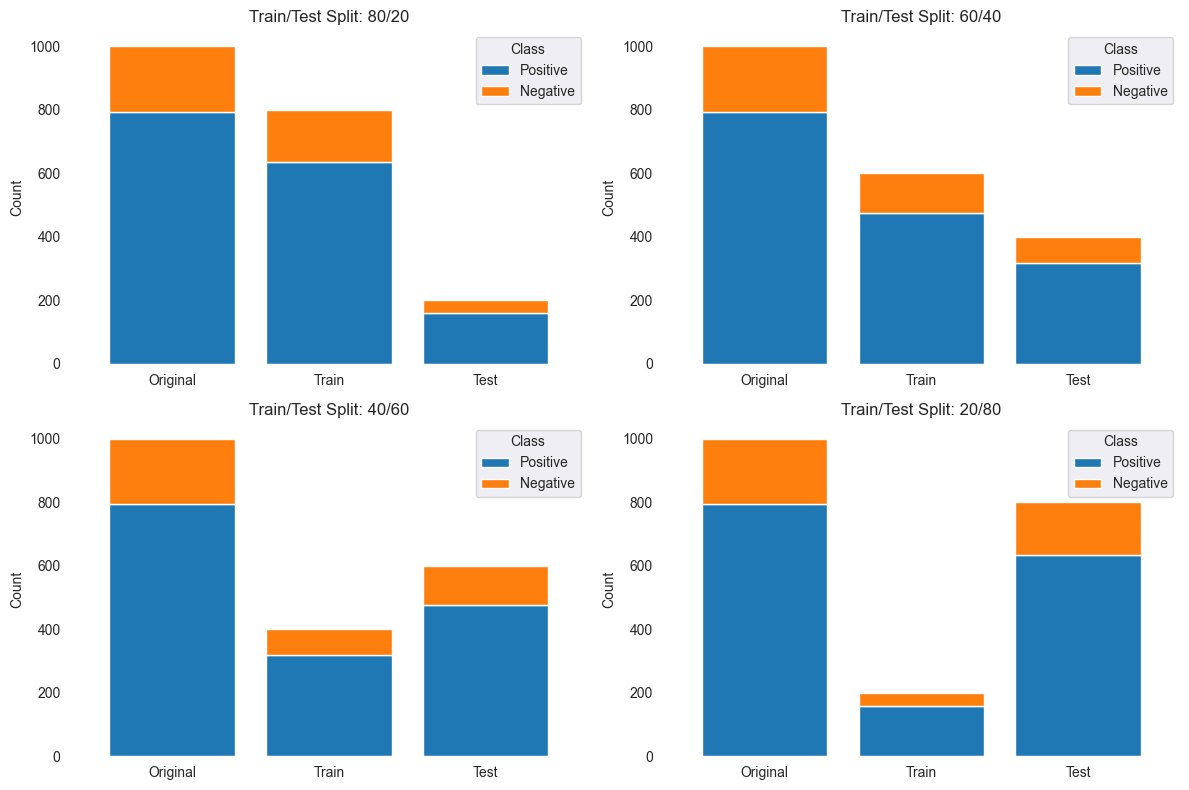

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate the dataset
n_samples = 1000
classes = ['Positive', 'Negative']
data = pd.DataFrame({
    'features': np.random.randn(n_samples),
    'label': np.random.choice(classes, size=n_samples, p=[0.8, 0.2])
})

# Define test proportions
test_proportions = [0.2, 0.4, 0.6, 0.8]

# Prepare figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, test_size in enumerate(test_proportions):
    # Split dataset with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        data['features'], data['label'], test_size=test_size, stratify=data['label'], random_state=42
    )

    # Count class distributions
    original_counts = data['label'].value_counts().reindex(classes)
    train_counts = pd.Series(y_train).value_counts().reindex(classes)
    test_counts = original_counts - train_counts # pd.Series(y_test).value_counts().reindex(classes)
    test_counts2 = pd.Series(y_test).value_counts().reindex(classes)
    print(f"O: {original_counts}\nT: {train_counts}\nt1: {test_counts}\nt2: {test_counts2}")
    # Create DataFrame for plotting
    df = pd.DataFrame({
        'Original': original_counts,
        'Train': train_counts,
        'Test': test_counts
    })

    # Plot stacked bar chart
    df.T.plot(kind='bar', stacked=True, ax=axes[i], color=['#1f77b4', '#ff7f0e'], width=0.8)
    axes[i].set_facecolor('white')

    axes[i].set_title(f'Train/Test Split: {round((1-test_size)*100)}/{round(test_size*100)}')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Class', labels=classes)
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
# plt.savefig('class_distribution_stacked.png')
plt.show()

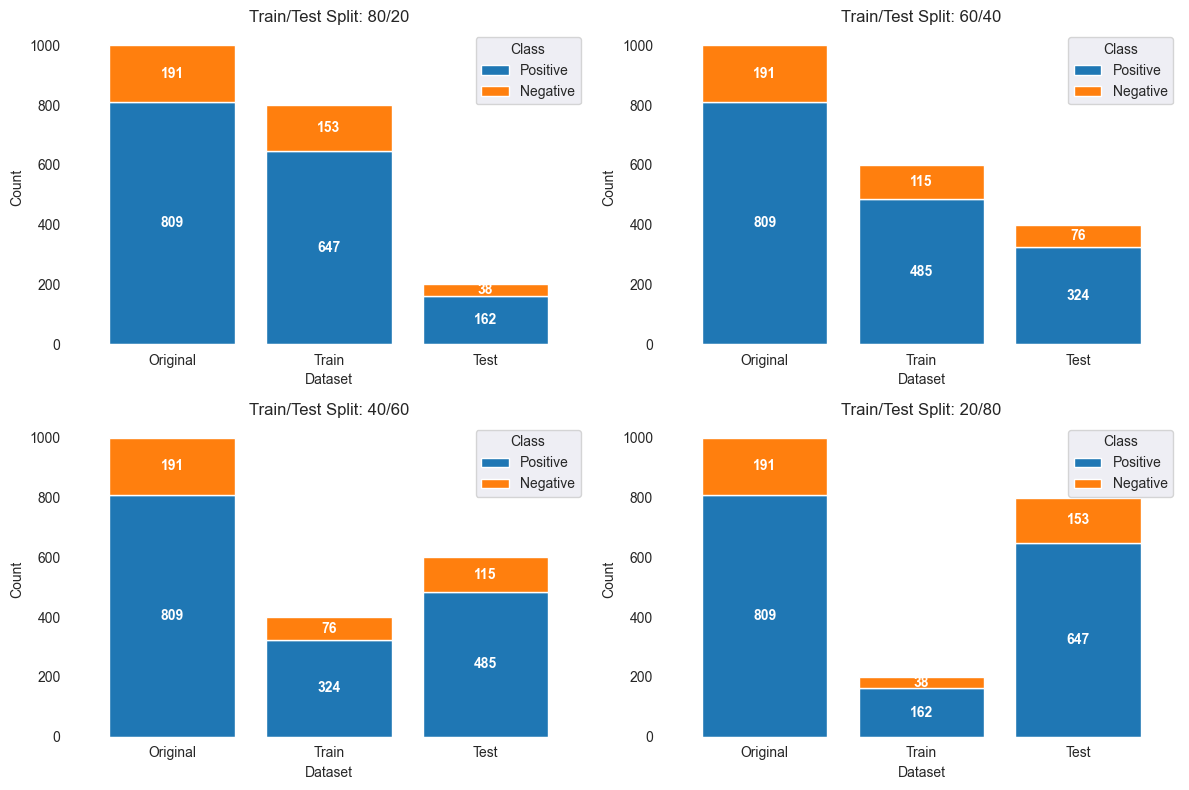

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate the dataset
n_samples = 1000
classes = ['Positive', 'Negative']
data = pd.DataFrame({
    'features': np.random.randn(n_samples),
    'label': np.random.choice(classes, size=n_samples, p=[0.8, 0.2])
})

# Define test proportions
test_proportions = [0.2, 0.4, 0.6, 0.8]

# Prepare figure with subplots and white background
fig, axes = plt.subplots(2, 2, figsize=(12, 8), facecolor='white')
axes = axes.flatten()

for i, test_size in enumerate(test_proportions):
    # Split dataset with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        data['features'], data['label'], test_size=test_size, stratify=data['label'], random_state=42
    )

    # Count class distributions
    original_counts = data['label'].value_counts().reindex(classes)
    train_counts = pd.Series(y_train).value_counts().reindex(classes)
    test_counts = pd.Series(y_test).value_counts().reindex(classes)

    # Create DataFrame for plotting
    df = pd.DataFrame({
        'Original': original_counts,
        'Train': train_counts,
        'Test': test_counts
    })

    # Plot stacked bar chart
    ax = axes[i]
    bars = df.T.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'], width=0.8)

    # Add counters (text labels) to each segment
    for bar in bars.patches:
        height = bar.get_height()
        width = bar.get_width()
        x = bar.get_x()
        y = bar.get_y()
        if height > 0:  # Only add label if segment exists
            label = f'{int(height)}'
            ax.text(
                x + width / 2, y + height / 2, label,
                ha='center', va='center', color='white', fontsize=10, fontweight='bold'
            )

    # Customize plot
    ax.set_facecolor('white')
    # Set axes background to white
    ax.set_title(f'Train/Test Split: {round((1-test_size)*100)}/{round(test_size*100)}')
    ax.set_ylabel('Count')
    ax.set_xlabel('Dataset')
    ax.legend(title='Class', labels=classes)
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
# plt.savefig('class_distribution_stacked_with_counters_white_bg.png', facecolor='white')
plt.show()